<a href="https://colab.research.google.com/github/AnnaVithoriaMS/BlogLiterario/blob/main/relatorio_diamantesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados foram encontrados em:
    https://www.kaggle.com/shivam2503/diamonds

Diamante são pedras preciosas constituídas de carbono, o diamante é o mineral de maior dureza na escala Mohs, isso significa que um diamante só pode ser riscado por o utro diamante. São pedra formadas com detererminadas condições de pressão e temperatura. 



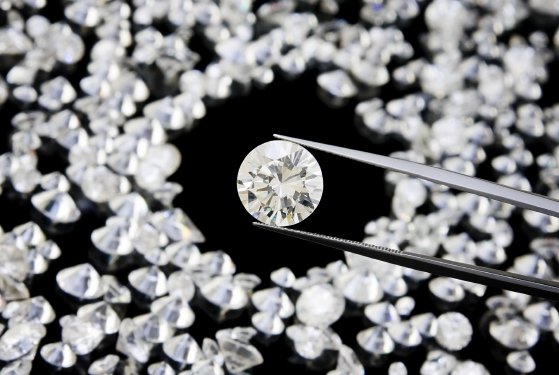

Os diamantes são classificados pelo usando o metodo dos 4C's, isso é o valor dos diamantes são determinados a partir de quatro criteiros corte (cut ), peso (carat), cor (color) e pureza (clarity).


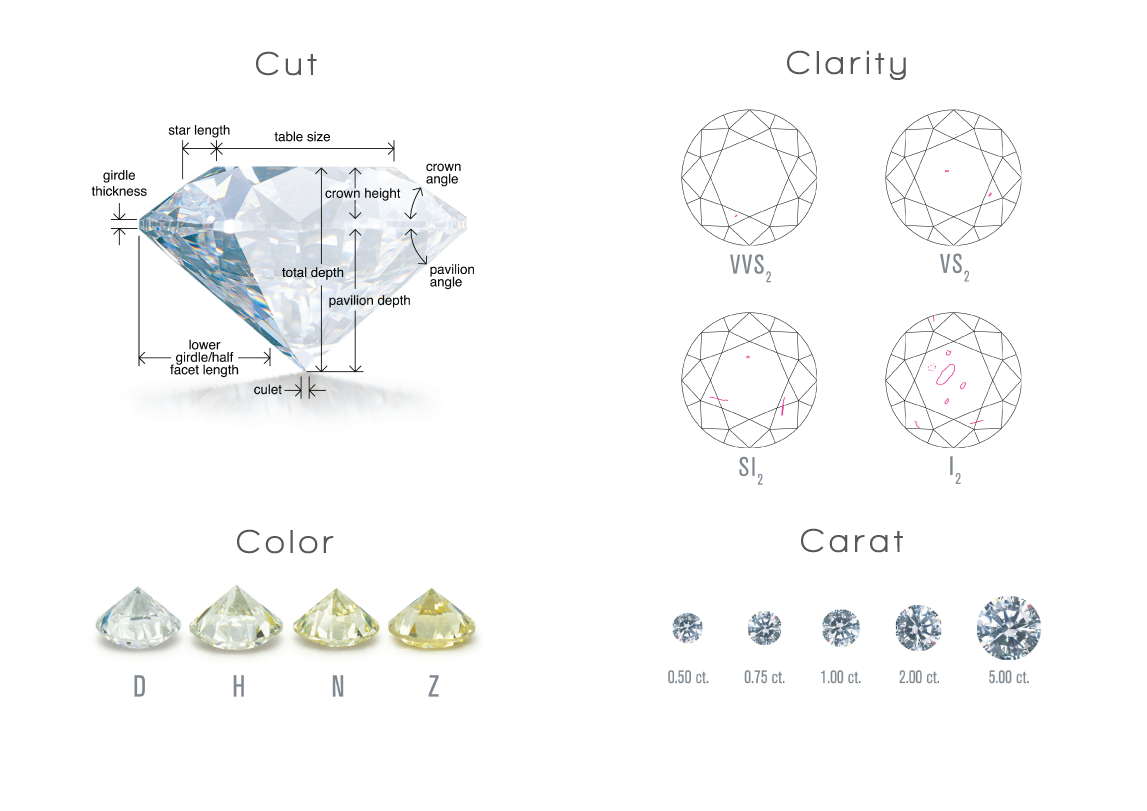

**Objetivos**

Identificar o que  mais afeta o valor dos diamantes e avaliar as observações usando o 4C's. 
*   Como o peso afeta o preço
*   Como a cor vai afetar o preço
*   Como o corte afeta o preço
*   Como o nível de pureza do diamante pode ser determinate
*   Por que pedras muito parecidas teriam valores diferentes





Biblioteca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from plotnine import *

O conjunto de dados é composto por 53940 observações , 11 preditores. Os dados apresentam amostras de diamantes e buscam predizer as características que mais  interferem no preço dos diamantes. No conjunto não foram encontrados valores faltantes, sendo 8 atributos numéricos e três categóricos.

Os preditores são:

1. "Unnamed : 0”: O índice que representa da amostra;
2. “carat” :  O peso do diamante em quilates
3. "cut":   que representa o tipo de corte do diamante, podendo ser  “Fair”, aceitável, a menor classificação,  “Good”, “Very Good”, “Ideal” e “Premium”, a de maior valor;
4. “color”:   Uma escala categoria que vai do maior valor “D” ao   menor “J”;
5. “clarity”: Um grau de pureza da pedra, uma medida que demonstra o quanto o diamante é claro, em uma escala que vai 
I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (ideal)
6. depth”: A profundidade relativa da pedra
7. “table”: superfície plana que você pode ver quando olha para o diamante de cima
8. “price” : O preço do diamante
9. “x “:  largura em milímetros
10. “y” : comprimento em milímetro     
11.  “z” : altura em milímetros







Visualização dos dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print("Tamanho: ", df.shape)
print("Nome dos Atributos: ", df.columns)

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

A descrisão dos valores numéricos foi feita calculando a média, o desvio padrão, ou seja, a medida de dispersão dos valores em relação a média, além do contador. Há também os valores de máximo e mínimo para cada um dos preditores. Os quartis o primeiro até 25%, o segundo  50% e o terceiro  75% indicam o valor abaixo no qual uma dada porcentagem das observaçoes se encontra, assim 25% dos diamantes tem preço menor que 950 dolares, logo estão no primeiro quartil.

In [ ]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


A assimetria permite analisar a distribuição dos dados. Assim dados simetricos tem assimetria muito próxima de 0, porém a assimetria pode ser positiva com negativa. Dessa forma uma assimetria positiva significa que o valorda assimetria é maior que 0 e esta mais concetrado em valores baixo,  que gera a "calda' para a direita. Há também a assimetria negativa, nesse caso o valor assimetrico é menor que zero e os dados estão concentrados em valores mais altos.

Assim é possível afirmar que os valores de depth estão concentrados em valores maiores, apesar do coeficiente próximo de zero, assim como são proximos de 0 as assimetrias de table e de x, indicando uma certa uniformidade dos dados, o restante apresenta assimetria positiva o que indica os dados estando mais concentrados em valores menores.

In [ ]:
df.skew()

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

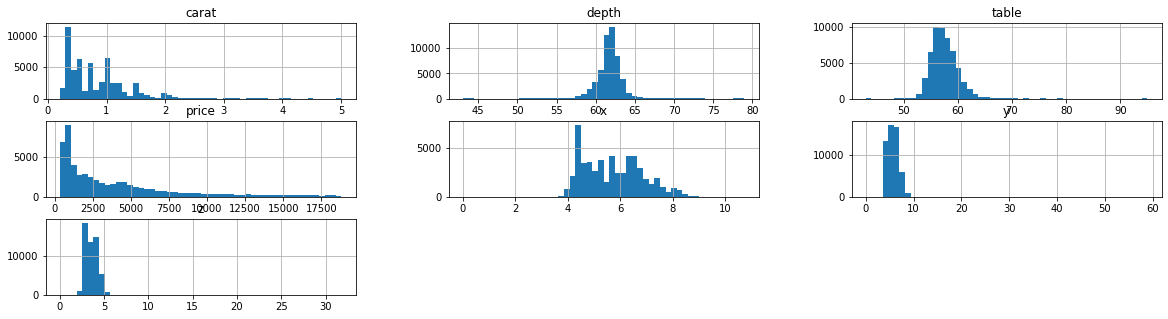

In [ ]:
df.hist(bins=50,figsize=(20,5))
plt.show()

**QUANTITATIVOS**

**CARAT**

O quilate é uma unidade de medida de peso que representa 200 miligramas, ou 1/5 de uma grama.Um diamante de 1 quilate pesa então 0,20 gramas.Mas nem sempre o tamanho da pedra aumenta na mesma proporção do peso.
qualidade do corte do diamante influencia o tamanho e o peso.
Um diamante pode ser classificado com pontos assim uma pedra que  tenha 50 pontos é de meio quilate (0,5 ct), ou ainda, dizer que um diamante tem 100 pontos é o mesmo que falar que ele possui 1 quilate.


A coluna “carat” tem média (𝝁) 0.798, desvio padrão de 0.474 e assimetria 1.1167. Com os dados é possível notar que pelo menos 50% das observações pesa  até 0.7 quilates e a maior parte das amostras  não chegar a pesar 2. Além de uma assimetria positiva o que indica que os dados são mais concentrados nos valores menores. 

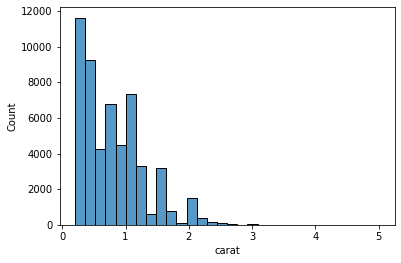

In [ ]:
sns.histplot(data=df, x="carat",bins=30)

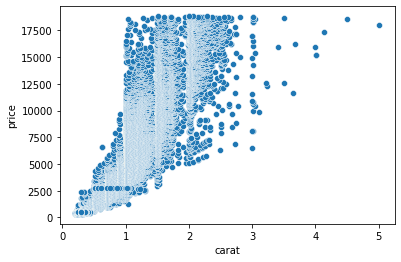

In [ ]:
sns.scatterplot(data=df, x="carat", y="price")

**Depth**

Profundidade de um diamante é a sua altura medida do culet a mesa. Existe duas classificações de profundidade uma delas em milímetro e a outra uma porcentagem.  
depth = 2 * z / (x + y).
Quando os raios de luz entram em um diamante, a profundidade de um diamante afeta como os raios de luz viajarão e serão refletidos dentro dele.
Para criar um retorno de luz e brilho ideais, a porcentagem de profundidade ideal de um diamante dependeria de sua forma e pode variar com base na relação intrincada com outras facetas


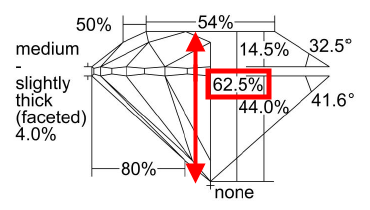

 Já o atributo “depth” tem média  igual a 61.75, o std é 1.433 e assimetria -0.0823. A assimetria negativa implica que a maioria das amostras está concentrada em valores altos. A maioria das amostras está concentrada no intervalo de 60% até 65% de profundidade.

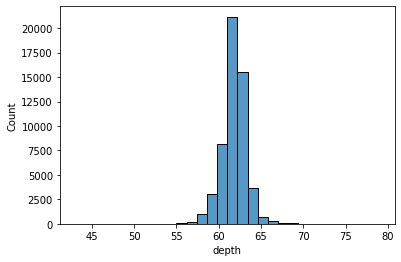

In [ ]:
sns.histplot(data=df, x="depth",bins=30)

**TABLE**

A table é a largura da mesa (parte plana superior) expressa como a porcentagem do seu diâmetro médio. 
A porcentagem da mesa do diamante é calculada dividindo a largura da mesa (área da superfície superior) pela largura (diâmetro) do diamante.
Se a porcentagem da tabela for muito grande, a luz não será refletida nos ângulos e facetas da coroa de diamante. Reflexos de cores vibrantes não serão vistos, pois a luz escapará do topo do diamante em vez de alcançar o olho.
Se a porcentagem da tabela for muito baixa, a luz permanecerá presa no interior do diamante e será emitida por outras partes do diamante em vez de ser vista.


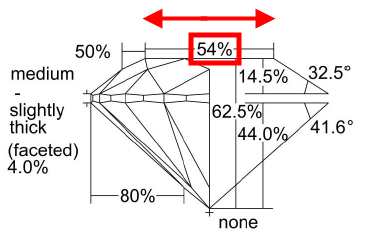

A média encontrada para o atributo table foi de 57.46, já o desvio padrão é de 2.234. A assimetria encontrada 0.797. 

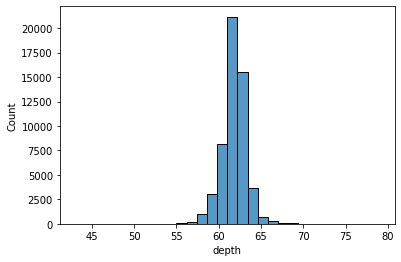

In [ ]:
sns.histplot(data=df, x="depth",bins=30)

**Dimensões**

Os atributos de medida “x”, “y” e “z” têm médias 5.731, 5734 e 3.54, respectivamente.O atributo de largura tem desvio 1.122, o desvio do comprimento é 1.142 e de altura é 0.706. Sobre os coeficientes assimétricos são 0.378 para “x”, 2.343 para “y” e 1.522 para “z”

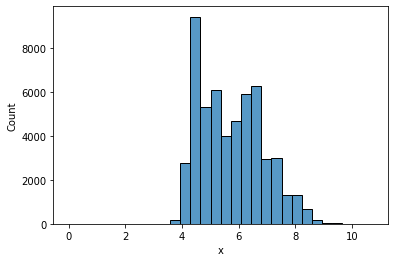

In [ ]:
sns.histplot(data=df, x="x",bins=30)

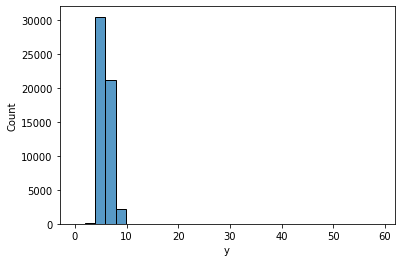

In [ ]:
sns.histplot(data=df, x="y",bins=30)

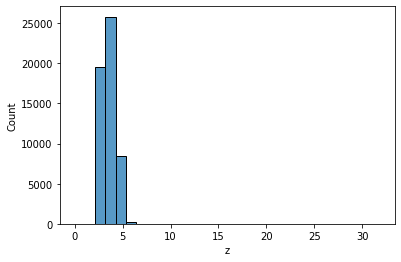

In [ ]:
sns.histplot(data=df, x="z",bins=30)

Analisando as dimensões é possível obter o volume das pedras, isso é feito multiplicando as três variáveis

In [ ]:
df['volume'] = df['x']*df['y']*df['z']


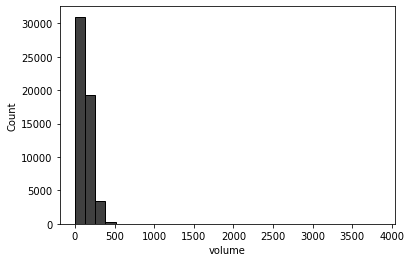

In [ ]:
sns.histplot(data=df, x="volume",bins=30, color= 'black')

Isso permite retiramos os temos x, y e z, permanecendo com o volume

In [ ]:
df.drop(['x','y','z'], axis=1, inplace= True)

In [ ]:
df.describe()

,carat,depth,table,price,volume
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,129.849403
std,0.474011,1.432621,2.234491,3989.439738,78.245262
min,0.200000,43.000000,43.000000,326.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,65.136830
50%,0.700000,61.800000,57.000000,2401.000000,114.808572
75%,1.040000,62.500000,59.000000,5324.250000,170.842451
max,5.010000,79.000000,95.000000,18823.000000,3840.598060


In [ ]:
df.skew()

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

**CATEGÓRICOS**

**CUT**

Corte do diamante diz respeito a como o diamante foi cortado e lapidado. A lapidação consiste em dois parâmetros muito diferentes: as proporções (ângulos e alturas) e o grau de acabamento (simetria e polimento)
A qualidade do corte afeta diretamente a beleza e o brilho do diamante. Um diamante bem cortado é luminoso e reflete a luz branca e colorida de volta aos seus olhos. Um diamante mal lapidado é opaco em vez de brilhante.
O corte do diamante são classificados em:

*   Fair
*   Good
*   Very Good
*   Ideal   
*   Premium







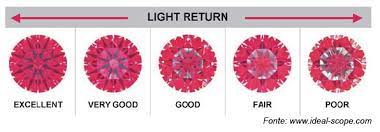

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



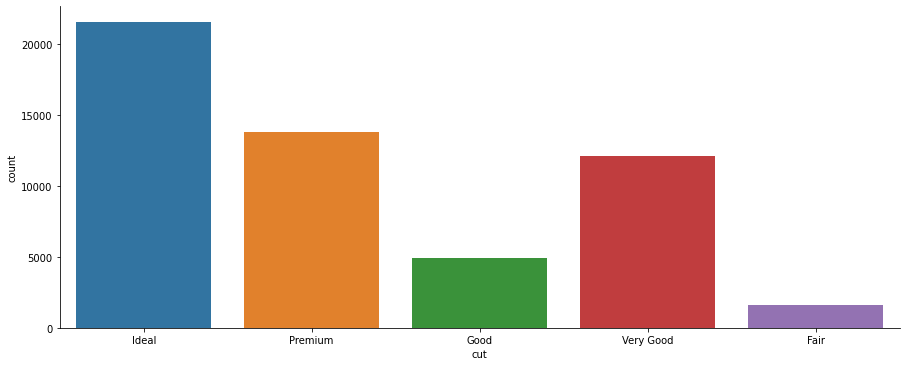

In [ ]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )

In [ ]:
df_cut = df.groupby(["cut"])


In [ ]:
df_cut.describe()

In [ ]:
df.groupby('cut').hist(figsize = (10,5),bins = 30, color = 'magenta')

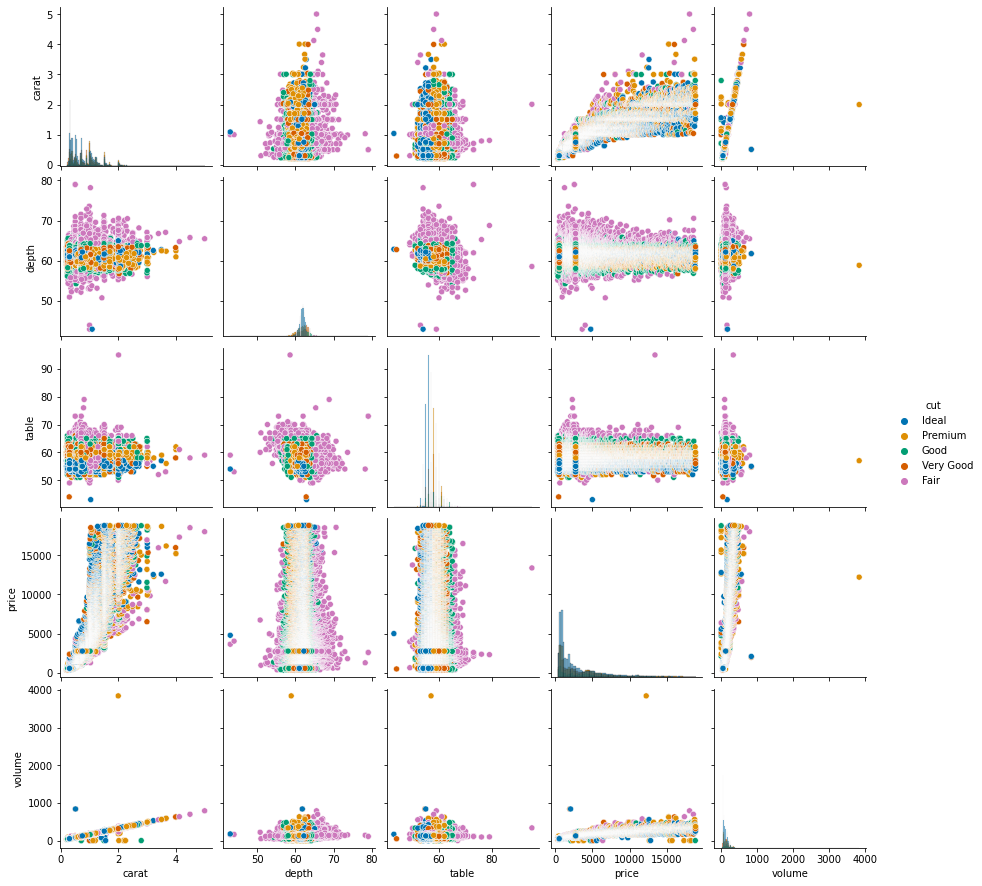

In [ ]:
sns.pairplot(df, hue='cut',palette='colorblind',diag_kind="hist")
plt.show()

**COLOR**

A cor se refere ao tom natural dos diamantes incolores, na natureza a maioria deles tem cor amarelada.
Por isso o GIA criou uma classificação de cores que vão de D ao Z, no entanto as amostras foram classificadas apenas do D ao J. Em que quanto mais incolor a pedra for mais alta ela estará na escala.
À exceção de alguns diamantes coloridos como os vermelhos, o diamante mais valioso no que diz respeito à cor é o completamente incolor.

D = Excepcionalmente incolor extra

E = Excepcionalmente incolor

F = Perfeitamente incolor 

G = Nitidamente incolor

H = Incolor

I = Cor levemente perceptível

J = Cor perceptível


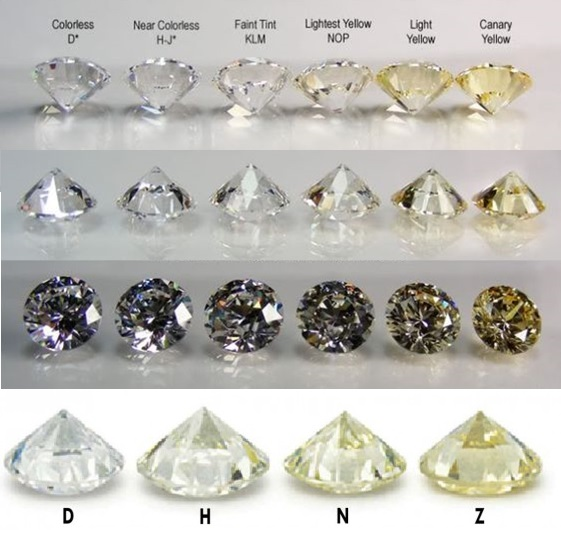

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



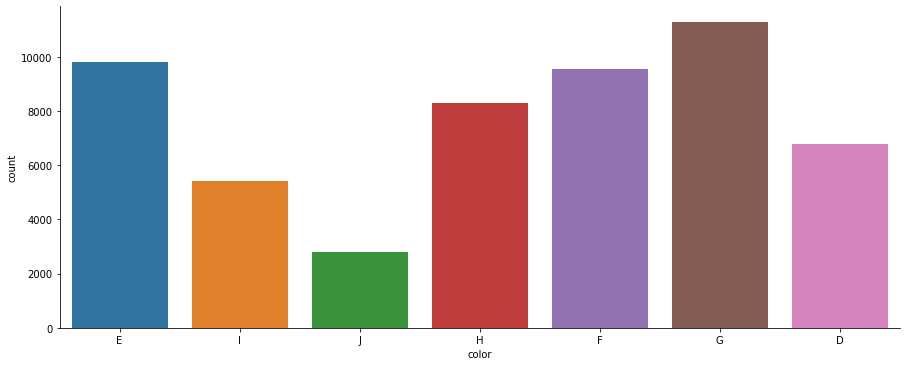

In [ ]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )

In [ ]:
df_color = df.groupby("color")


In [ ]:
df_color.describe()

In [ ]:
df_color.hist(figsize = (10,5),bins = 30, color = 'green')

In [ ]:
sns.pairplot(df, hue='color',palette='colorblind',diag_kind="hist")
plt.show()

**CLARITY**

A pureza está relacionada quanto menos fraturas ou outras imperfeições e inclusões contiver o diamante, melhor é a sua qualidade tornando-se, desta forma, mais valioso. A existência de fraturas ou defeitos internos reduz seus valores em bruto, pois diminui o volume de aproveitamento no processo de lapidação.
A quantidade, tamanho, posição e natureza das imperfeições (jaça)  definem o grau de pureza do diamante. Um diamante classificado IF ( Internally Flawless - Internamente livre de inclusões) é considerado o mais puro.
Uma pedra é avaliada como pura se, sob uma ampliação de dez vezes, nenhuma inclusão (impureza interna) e nenhuma mancha (impureza externa) forem visíveis


A classificação de pureza vão do I3 são peças com grandes inclusões e é o nível mais baixo, o nível mais alto é o FL que é considerado extremamente puro.
Porém as observações apresentadas vão do IF, inteiramente livre de inclusões, ao I1, esses apresentam inclusões evidentes com lupa de 10x.


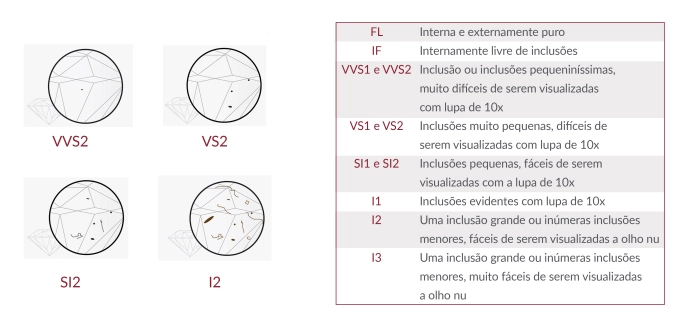

In [ ]:
sns.factorplot(x='clarity', data=df , kind='count',aspect=2.5 )

In [ ]:
df_clarity = df.groupby("clarity")


In [ ]:
df_clarity.describe()

In [ ]:
sns.pairplot(df, hue='clarity',palette='colorblind',diag_kind="hist")
plt.show()

**CORRELAÇÕES**

Os coeficientes de correlação são métodos estatísticos para se medir as relações entre variáveis e o que elas representam. A correlação procura entender como uma variáveol se comporta em um cenário em que a outra esta variando, assim é possível entender a relação e variabilidade entre ambas. Desse modo o coeficiente quantifica essa relação, ele pode aparecer positivo ou negativo. 

No caso de o coeficiente ser negativo os dados apresentam correlação ineversa, ou seja, são descorrelacionados, enquanto positivo há uma relação linear. Esses coeficientes quando possuiem uma proximidade de 1, significa que eles são muito correlacionados, ao passo que se for -1 os dados são bastante descorrelacionados.

Alguns dos preditores apresentavam um coeficiente de correlação muito alto, os preditores "carat", "price" e "volume" tem correlações muito proximas de 1, isso é interpretável que com o crescimento do peso e do volume, o preço ira aumentar e que um volume maior representa um peso maior.

Há também coeficiente negativos é o caso de "depth" e "table" o coeficiente de -0.3 simboliza que se um cresce o outro decresce, algo parecido ocorre com o "price" e "depth", o coeficiente, apesar de ser bem próximo a zero, ele é negativo, o que ainda representa uma descorrelação. 

In [ ]:
corr = df.corr()
corr

,carat,depth,table,price,volume
carat,1.000000,0.028224,0.181618,0.921591,0.976308
depth,0.028224,1.000000,-0.295779,-0.010647,0.009157
table,0.181618,-0.295779,1.000000,0.127134,0.167400
price,0.921591,-0.010647,0.127134,1.000000,0.902385
volume,0.976308,0.009157,0.167400,0.902385,1.000000


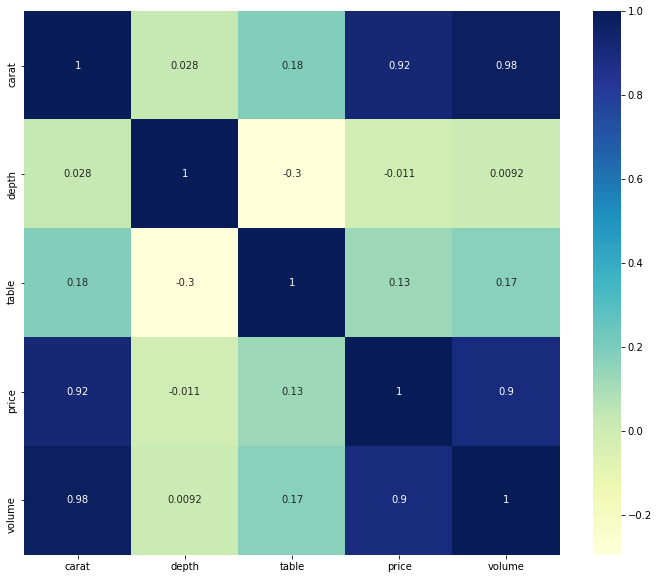

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True,cmap ="YlGnBu")

**OUTLIERS**


Os outliers são dados são dados discrepantes. Esses outliers foram detectados usando a variação interquartis. Assim o IQR é calculado usando a diferença entre os quatis maior (0.75) e menor (0.25).

Assim os valores abaixo de Q1​ − (1,5*IQR) e os valores acima de Q3​ − (1,5*IQR) são considerados outliers. Esses resultados são facilmente observados com a ajuda dos boxplots.

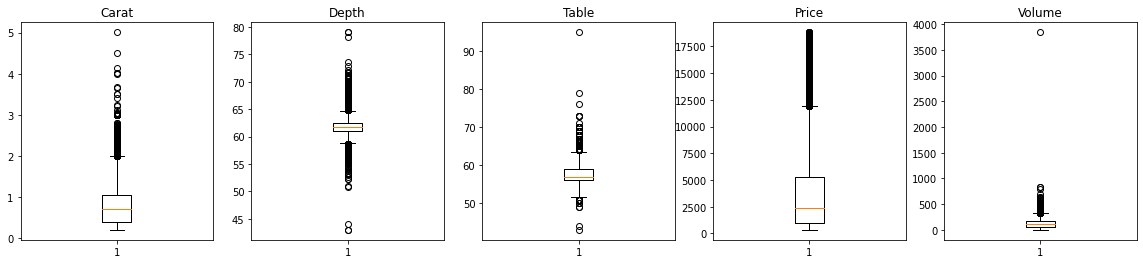

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20,4))
axes[0].boxplot(df['carat'])
axes[0].set_title("Carat")
axes[1].boxplot(df['depth'])
axes[1].set_title("Depth")
axes[2].boxplot(df['table'])
axes[2].set_title("Table")
axes[3].boxplot(df['price'])
axes[3].set_title("Price")
axes[4].boxplot(df['volume'])
axes[4].set_title("Volume")

plt.show()

In [ ]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

carat        0.640000
depth        1.500000
table        3.000000
price     4374.250000
volume     105.705621
dtype: float64

In [ ]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

In [ ]:
outliers_iqr= df[outliers.any(1)]
outliers_iqr.count()

carat      6410
cut        6410
color      6410
clarity    6410
depth      6410
table      6410
price      6410
volume     6410
dtype: int64

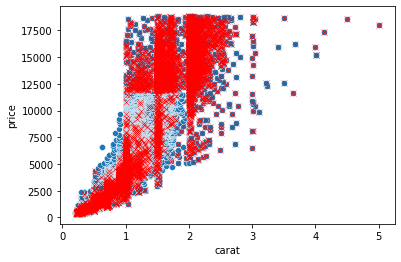

In [ ]:

sns.scatterplot(x='carat', y='price', data=df)
sns.scatterplot(x='carat', y='price', data=outliers_iqr, marker="x",color='red')
plt.show()

In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

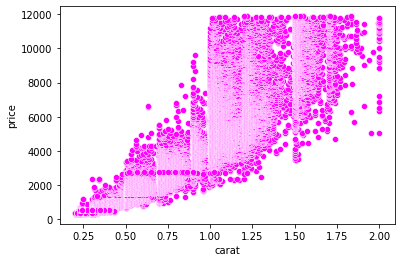

In [ ]:
sns.scatterplot(x = "carat", y = "price", data=df_out,color= "magenta")

**Resultados**

Ao fazer a análise dos dados é perceptível que alguns dados possuíam uma relação linear expressiva, assim preditores de medidas, como os "x", "y" e "z", têm forte ligação com o peso, coluna "carat". O que faz sentido, já que a largura, comprimento e altura juntos formam o volume, se esse volume aumenta e de se esperar que o peso também cresça. O que afeta bastante no preço, diamante como menos quilates apresentam valor menor, comparado aos mais pesados. 

É importante levar em consideração o corte, cor e clareza do diamante e como eles afetam o valor do mesmo. Para o corte temos a média mais alta do preço  para os diamantes “Premium” , mesmo a média do peso sendo menor, a média de preço dos diamantes “Fair” também é alta, mas deve ser levado em consideração a quantidade menor de unidades e eles também são mais pesados, o que encarece algumas amostras. A correlação  de preço e peso é menor para os diamantes  com corte de menor qualidade e aumenta à medida que a qualidade do corte melhora. Assim os de corte "Premium'' são os mais caros seguidos pelos “Very Good ``.

Já  a clareza, indicando as imperfeições, os tipos  “VS1” e ”VS2” afetam bastante no preço, já que eles apresentam um maior máximo. No entanto, a maior média são os “SI2”, os “IF”, apesar de serem os de nível mais alto, não é possível notar o quanto isso afeta no preço. Assim, níveis de clareza afetam o preço, mas os diamantes de clareza inferior podem ser mais caros que de superior, além do mais, analisando a correlação entre preço e corte a menor é para os de “IF”.

A cor dos diamantes com maior número de amostras é tipo “G”,esse tipo também possui maior média e máximo. Mas os diamantes que têm preços mais elevados são as “I” e “J”, que são as cores consideradas menos adequadas, provavelmente isso ocorre por elas também terem maior peso, tendo em vista que a maior correlação do preço com o peso diminui à medida que a cor melhorava, para o “D”, considerada ideal, o coeficiente de correlação é de 0,9 e para o “J” 0.95, a influência da cor parece ser menor.



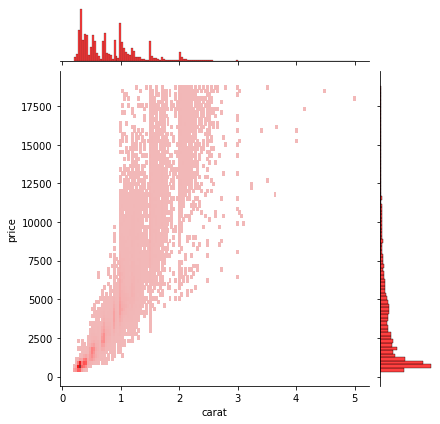

In [ ]:
sns.jointplot(data=df, x="carat", y="price", kind="hist", color='red')

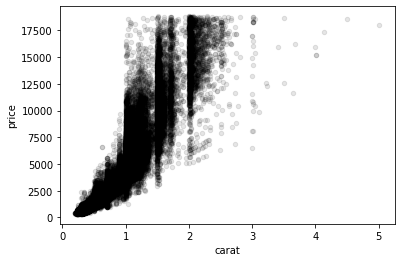

In [ ]:
df.plot(kind="scatter", x="carat", y="price", alpha=0.1, color = 'black')

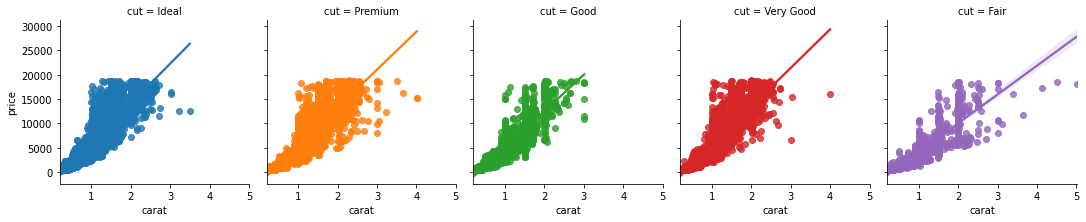

In [ ]:
sns.lmplot(x="carat",y="price",data=df,hue = 'cut',   col="cut",height=3)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


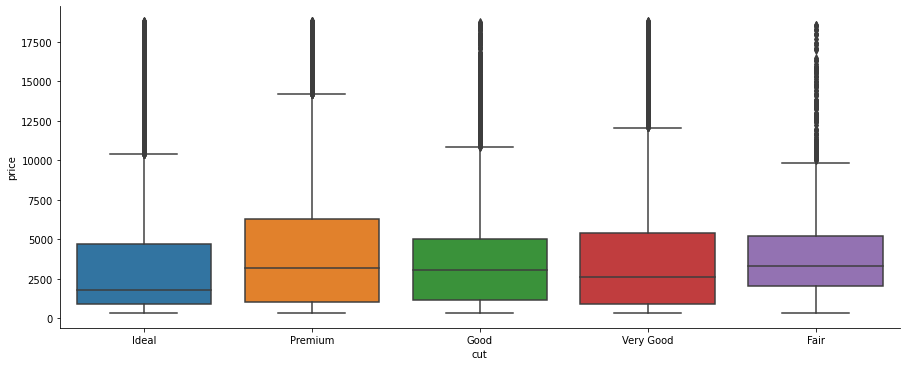

In [ ]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


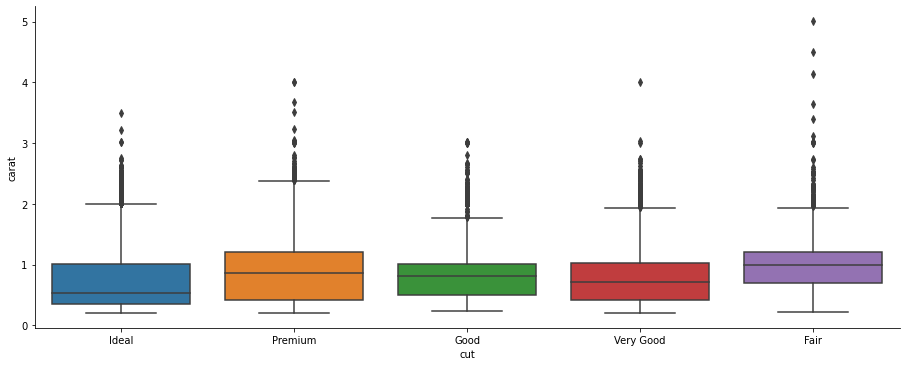

In [ ]:
sns.factorplot(x='cut', y='carat', data=df, kind='box' ,aspect=2.5 )

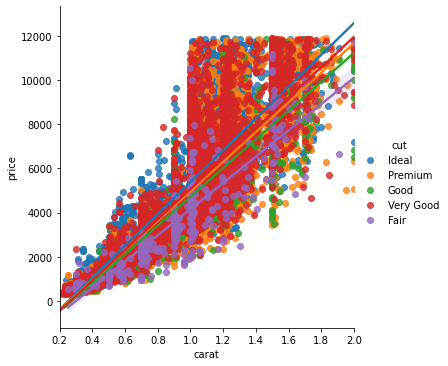

In [ ]:
sns.lmplot(x="carat",y="price",hue = 'cut',  data=df_out)
plt.show()

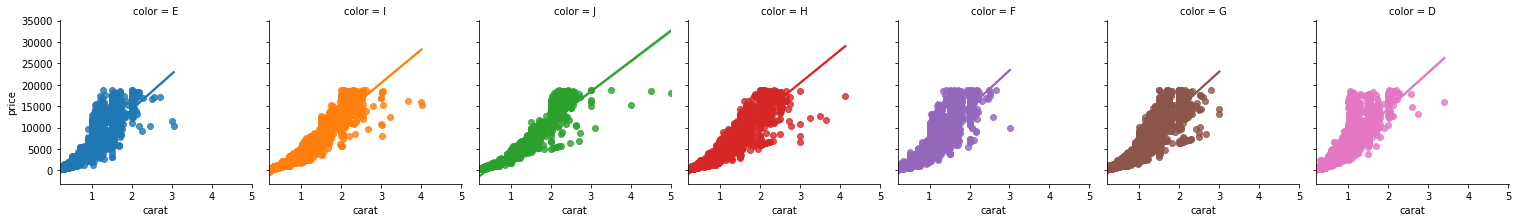

In [ ]:
sns.lmplot(x="carat",y="price",data=df,hue = 'color',   col="color",height=3)
plt.show()

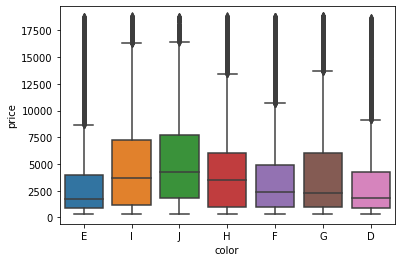

In [ ]:
sns.boxplot(x='color', y='price', data=df )

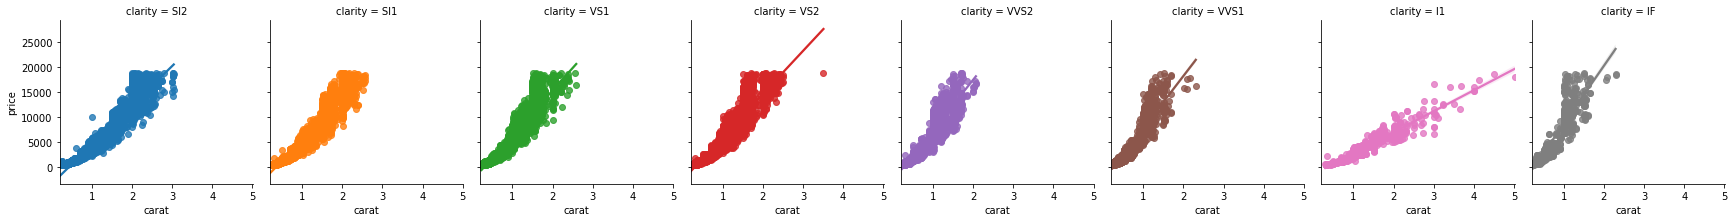

In [ ]:
sns.lmplot(x="carat",y="price",data=df,hue = 'clarity',   col="clarity",height=3)
plt.show()

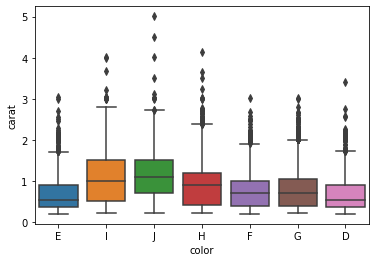

In [ ]:
sns.boxplot(x='color', y='carat', data=df )

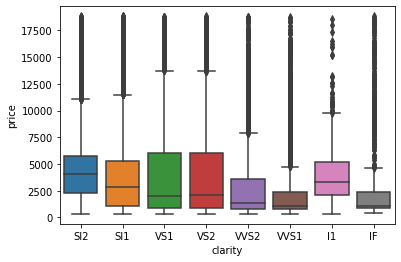

In [ ]:
sns.boxplot(x='clarity', y='price', data=df )

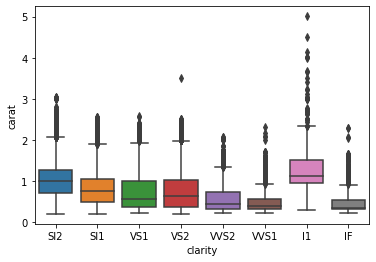

In [ ]:
sns.boxplot(x='clarity', y='carat', data=df )

**Bibliografia**

    
    Livros:
M. Kuhn, K. Johnson. Applied Predictive Modeling, 2014
G. James, D. Witten, T. Hastie and R. Tibshirani, An Introduction to Statistical
Learning with Applications in R2, 2014
Puneet Mathur.Machine Learning Applications Using Python,2019
Leandro de Nunes Castro, Daniel Gomes Ferrari. Introdução à mineração de dados: Conceitos básicos, algoritmos e aplicações,2016


In [ ]:
import numpy.linalg as la 
DF =  df.select_dtypes(include=np.number)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X = DF.drop(['price'], axis=1)
y = DF['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


####### Linear Regression #######
Score : 0.8498
[0.86059166 0.85191532 0.84891988 0.84921271 0.85371645]

MSE    : 2425342.70 
MAE    : 1003.59 
RMSE   : 1557.35 
R2     : 0.85 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
